In [1]:
from spacerocks.spacerock import SpaceRock
from spacerocks.simulation import Simulation
from spacerocks.model import PerturberModel, builtin_models
from spacerocks.units import Units

import numpy as np
from astropy import units as u

import matplotlib.pyplot as plt
%matplotlib inline

# Apparent motion on the sky

In [2]:
units = Units()
units.timescale = 'tdb'
#units.timeformat = 'jd'
units.mass = u.M_sun

spiceids, kernel, _ = builtin_models['GIANTS']
spiceids += ['Pluto Barycenter']

model = PerturberModel(spiceids=spiceids)
sim = Simulation(model=model, epoch='5 May 2022', units=units)

sim.integrator = 'ias15'

t0 = sim.epoch.tdb.jd
tf = t0 + 30 * 365.25
epochs = np.arange(t0, tf, 1)

prop, planets, sim = sim.propagate(epochs=epochs, units=units, exact_finish_time=1)
pluto = planets[planets.name == 'Pluto Barycenter']
nep = planets[planets.name == 'Neptune Barycenter']

Output()

In [3]:
obs = pluto.observe(obscode='W84')
ssb_obs = pluto.observe(spiceid='ssb')

/Users/edlin/opt/anaconda3/lib/python3.9/site-packages/erfa/core.py:154: ErfaWarning: ERFA function "taiutc" yielded 9256 of "dubious year (Note 4)"
  warnings.warn('ERFA function "{}" yielded {}'.format(func_name, wmsg),


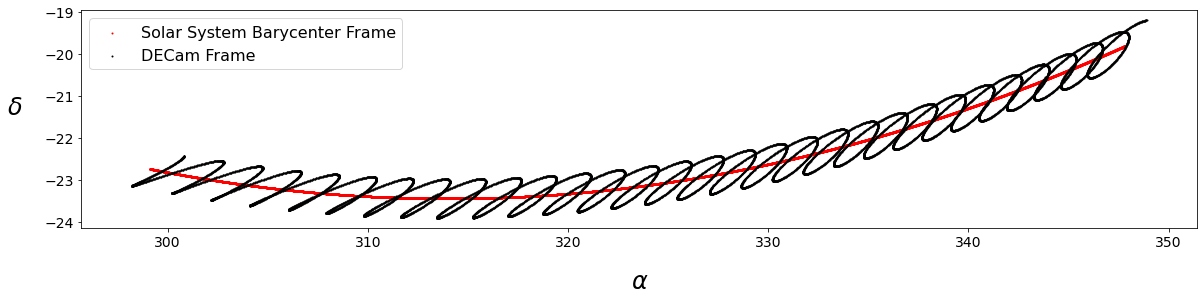

In [4]:
fig, ax = plt.subplots(figsize=(20, 4))
ax.scatter(ssb_obs.ra.deg, ssb_obs.dec.deg, s=1, color='red', label='Solar System Barycenter Frame')
ax.scatter(obs.ra.deg, obs.dec.deg, s=1, color='black', label='DECam Frame')
ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\alpha$', fontsize=24, labelpad=20)
ax.set_ylabel(r'$\delta$', fontsize=24, labelpad=30, rotation=0)
ax.legend(fontsize=16)

# Motion in Neptune's Frame

In [5]:
units = Units()
units.timescale = 'tdb'
#units.timeformat = 'jd'
units.mass = u.M_sun

spiceids, kernel, _ = builtin_models['GIANTS']
spiceids += ['Pluto Barycenter']

model = PerturberModel(spiceids=spiceids)
sim = Simulation(model=model, epoch='5 May 2022', units=units)
rock = SpaceRock.from_horizons('2010 JO179')
sim.add_spacerocks(rock)

sim.integrator = 'mercurius'
sim.dt = 50

t0 = sim.epoch.tdb.jd
tf = t0 + 50_000 * 365.25
epochs = np.arange(t0, tf, 0.1 * 365.25)

prop, planets, sim = sim.propagate(epochs=epochs, units=units, exact_finish_time=0)
pluto = planets[planets.name == 'Pluto Barycenter'] #ya, pluto is a planet
nep = planets[planets.name == 'Neptune Barycenter']
jo = prop[prop.name == '2010 JO179'] # Jo is a 21:5

Output()

Text(0, 0.5, '$y$')

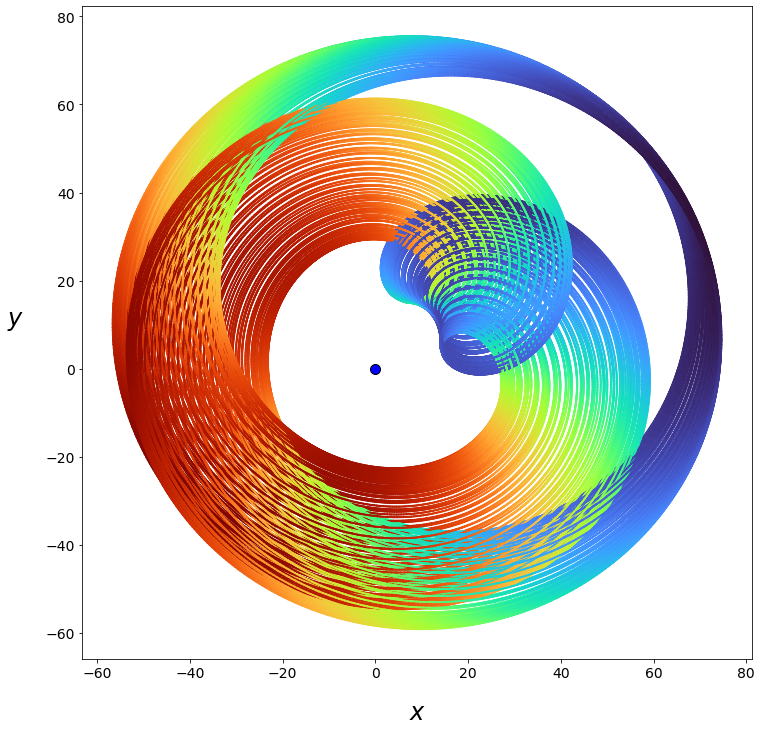

In [6]:
#This is Pluto
fig, ax = plt.subplots(figsize=(12, 12))
dx = pluto.x.au - nep.x.au
dy = pluto.y.au - nep.y.au
dz = pluto.z.au - nep.z.au
ax.scatter(dx, dy, s=1, c=dz, cmap='turbo')
ax.scatter(0, 0, s=100, edgecolor='black', linewidth=1, color='blue')
ax.tick_params(labelsize=14)
ax.set_xlabel(r'$x$', fontsize=24, labelpad=20)
ax.set_ylabel(r'$y$', fontsize=24, labelpad=30, rotation=0)

Text(0, 0.5, '$y$')

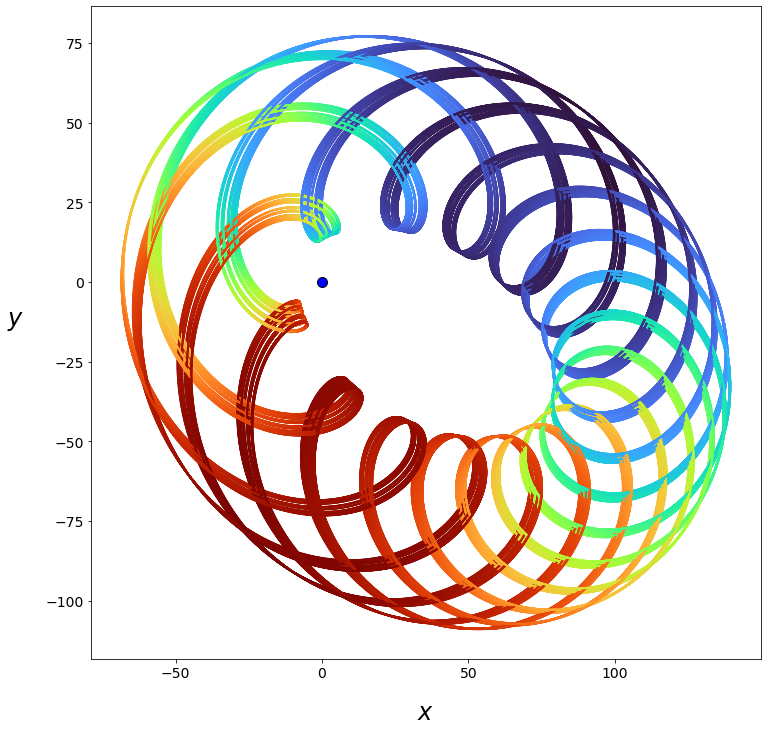

In [7]:
#This is Jo
fig, ax = plt.subplots(figsize=(12, 12))
dx = jo.x.au - nep.x.au
dy = jo.y.au - nep.y.au
dz = jo.z.au - nep.z.au
ax.scatter(dx, dy, s=1, c=dz, cmap='turbo')
ax.scatter(0, 0, s=100, edgecolor='black', linewidth=1, color='blue')
ax.tick_params(labelsize=14)
ax.set_xlabel(r'$x$', fontsize=24, labelpad=20)
ax.set_ylabel(r'$y$', fontsize=24, labelpad=30, rotation=0)

In [8]:
#get x, y position in Neptune's rotational frame 
nep_angle = nep.true_longitude 
rot = nep_angle - nep_angle[0] # neptune rotate this angle for each step 
x_nep = nep.x.au * np.cos(-rot) - nep.y.au * np.sin(-rot)
y_nep = nep.x.au * np.sin(-rot) + nep.y.au * np.cos(-rot)
x_pluto = pluto.x.au * np.cos(-rot) - pluto.y.au * np.sin(-rot)
y_pluto = pluto.x.au * np.sin(-rot) + pluto.y.au * np.cos(-rot)
x_jo = jo.x.au * np.cos(-rot) - jo.y.au * np.sin(-rot)
y_jo = jo.x.au * np.sin(-rot) + jo.y.au * np.cos(-rot)

Text(0, 0.5, '$y$')

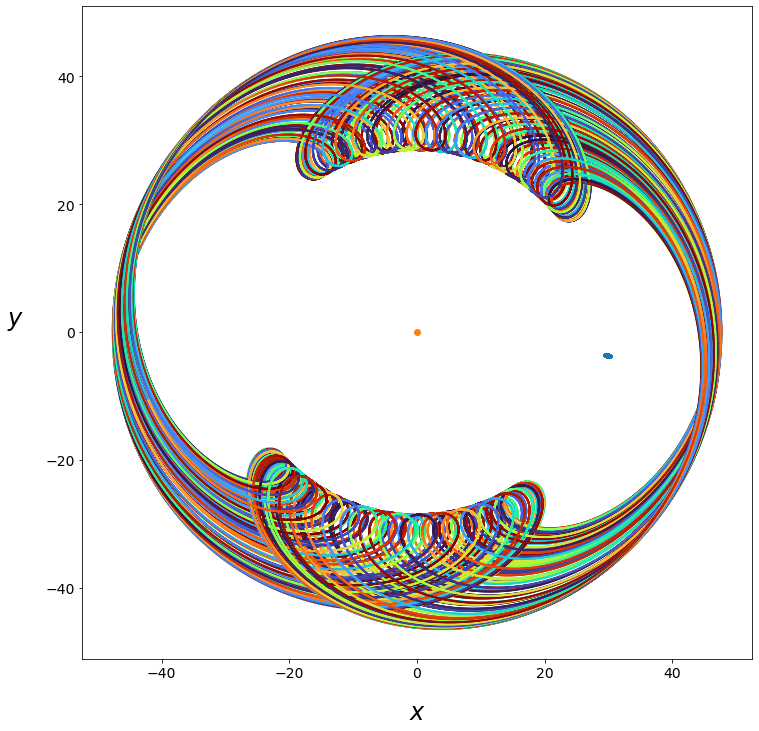

In [9]:
# Plot Pluto postion in Neptune's rotational frame
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(x_nep, y_nep, '.', label ='Neptune')
ax.plot(0, 0, 'o', label = 'Sun')
ax.scatter(x_pluto, y_pluto, s=1, c=dz, cmap='turbo')
#ax.legend(fontsize=24)
ax.tick_params(labelsize=14)
ax.set_xlabel(r'$x$', fontsize=24, labelpad=20)
ax.set_ylabel(r'$y$', fontsize=24, labelpad=30, rotation=0)

Text(0, 0.5, '$y$')

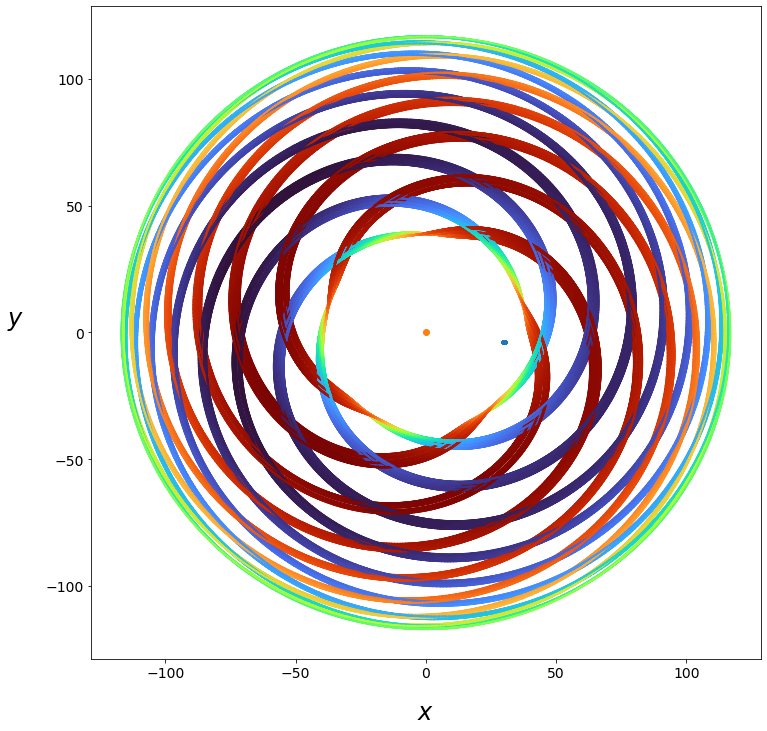

In [10]:
# Plot Jo postion in Neptune's rotational frame
fig, ax = plt.subplots(figsize=(12, 12))
ax.plot(x_nep, y_nep, '.', label ='Neptune')
ax.plot(0, 0, 'o', label = 'Sun')
ax.scatter(x_jo, y_jo, s=1, c=dz, cmap='turbo')
#ax.legend(fontsize=24)
ax.tick_params(labelsize=14)
ax.set_xlabel(r'$x$', fontsize=24, labelpad=20)
ax.set_ylabel(r'$y$', fontsize=24, labelpad=30, rotation=0)

# Long-Term Dynamics

In [11]:
units = Units()
units.timescale = 'tdb'
#units.timeformat = 'jd'
units.mass = u.M_sun

spiceids, kernel, _ = builtin_models['GIANTS']
spiceids += ['Pluto Barycenter']

model = PerturberModel(spiceids=spiceids)
sim = Simulation(model=model, epoch='5 May 2022', units=units)

sim.integrator = 'mercurius'
sim.dt = 50

t0 = sim.epoch.tdb.jd
tf = t0 + 10_000_000 * 365.25
epochs = np.arange(t0, tf, 1_000 * 365.25)

prop, planets, sim = sim.propagate(epochs=epochs, units=units, exact_finish_time=0)

Output()

In [12]:
pluto = planets[planets.name == 'Pluto Barycenter']
nep = planets[planets.name == 'Neptune Barycenter']
t = (pluto.epoch.jd - pluto.epoch.jd.min()) / 365.25e6

In [13]:
vec = np.array([pluto.mean_longitude.deg, nep.mean_longitude.deg, pluto.varpi.deg, nep.varpi.deg]).T
coeffs = np.array([3, -2, -1, 0])
phi = np.dot(vec, coeffs) % 360

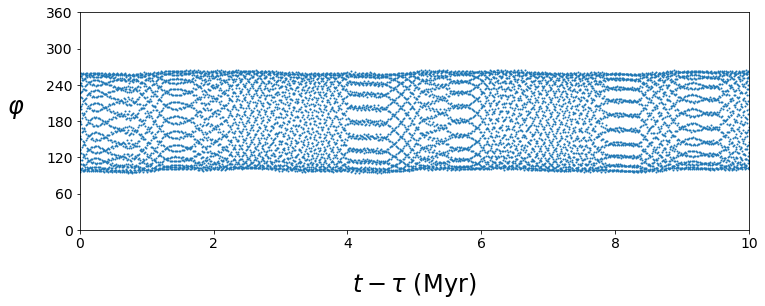

In [14]:
fig, ax = plt.subplots(figsize=(12, 4))
ax.scatter(t, phi, s=1, alpha=1)
ax.tick_params(labelsize=14)
ax.set_xlabel(r'$t - \tau$ (Myr)', fontsize=24, labelpad=20)
ax.set_ylabel(r'$\varphi$', fontsize=24, labelpad=30, rotation=0)
ax.set_xlim([t.min(), np.ceil(t.max())])
ax.set_ylim(0, 360)
ax.set_yticks([0, 60, 120, 180, 240, 300, 360]);

(0.0, 360.0)

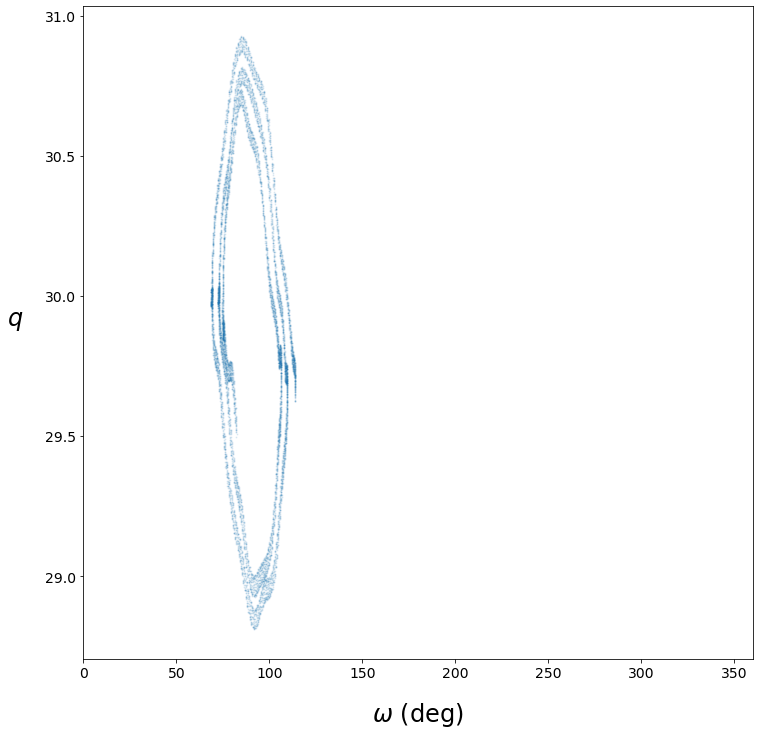

In [15]:
fig, ax = plt.subplots(figsize=(12, 12))
ax.scatter(pluto.arg.deg, pluto.q.au, s=1, alpha=0.1)
ax.tick_params(labelsize=14)
ax.set_xlabel(r'$\omega$ (deg)', fontsize=24, labelpad=20)
ax.set_ylabel(r'$q$', fontsize=24, labelpad=30, rotation=0)
ax.set_xlim([0, 360])